#### 컬럼 의미
- BMI (체질량지수): 체질량지수 (BMI)
- Smoking (흡연 여부): 평생 동안 담배를 100개비 이상 피운 적이 있습니까? (답변: 예 또는 아니오)
- AlcoholDrinking (음주): 과음자 (성인 남성은 주당 14잔 이상, 성인 여성은 주당 7잔 이상 음주하는 사람)
- Stroke (뇌졸중 여부): 뇌졸중을 진단받은 적이 있습니까?
- PhysicalHealth (신체 건강 상태): 지난 30일 동안 신체 건강이 좋지 않았던 날은 며칠이었습니까? (0-30일)
- MentalHealth (정신 건강 상태): 지난 30일 동안 정신 건강이 좋지 않았던 날은 며칠이었습니까? (0-30일)
- DiffWalking (보행 곤란): 걷거나 계단을 오르는데 심각한 어려움이 있습니까?
- Sex (성별): 당신은 남성입니까, 여성입니까?
- AgeCategory (연령 카테고리): 14단계 연령 카테고리
- Race (인종/민족): 추정된 인종/민족 값
- Diabetic (당뇨병 여부): 당뇨병 진단을 받은 적이 있습니까?
- PhysicalActivity (신체 활동 여부): 지난 30일 동안 일상적인 업무 외에 신체 활동이나 운동을 한 적이 있습니까?
- GenHealth (전반적인 건강 상태): 전반적으로 당신의 건강 상태는 어떻습니까?
- SleepTime (수면 시간): 24시간 기준으로 평균 몇 시간의 수면을 취하십니까?
- Asthma (천식 여부): 천식을 진단받은 적이 있습니까?
- KidneyDisease (신장 질환 여부): 신장 결석, 방광 감염 또는 요실금 제외, 신장 질환을 진단받은 적이 있습니까?
- SkinCancer (피부암 여부): 피부암을 진단받은 적이 있습니까?

[1] 모듈 로딩

In [1]:
#%pip install koreanize_matplotlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import koreanize_matplotlib
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

[2] CSV => DataFrame

In [2]:
file_name='../DATA/real_heart_b.csv'
df=pd.read_csv(file_name)
df.drop(columns='Unnamed: 0', inplace=True)

In [3]:
df.reset_index(inplace=True, drop=True)

[3] 데이터 전처리

In [4]:
df = df[df.columns].replace({'18-24':1, '25-29':2, '30-34':3, '35-39':4, '40-44':5, '45-49':6, '50-54':7, '55-59':8, '60-64':9, '65-69':10, '70-74':11, '75-79':12, '80 or older':13 })
df['AgeCategory'] = df['AgeCategory'].astype(int)

In [5]:
df = df[df.columns].replace({'Black':1, 'White':2, 'Other':3, 'American Indian/Alaskan Native':4, 'Asian':5, 'Hispanic':6})
df['Race'] = df['Race'].astype(int)

In [6]:
df = df[df.columns].replace({'Poor':1, 'Fair':2, 'Good':3, 'Very good':4, 'Excellent':5})
df['GenHealth'] = df['GenHealth'].astype(int)

[4] 데이터 분포 확인

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54746 entries, 0 to 54745
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   HeartDisease      54746 non-null  int64  
 1   BMI               54746 non-null  float64
 2   Smoking           54746 non-null  int64  
 3   AlcoholDrinking   54746 non-null  int64  
 4   Stroke            54746 non-null  int64  
 5   PhysicalHealth    54746 non-null  float64
 6   MentalHealth      54746 non-null  float64
 7   DiffWalking       54746 non-null  int64  
 8   Sex               54746 non-null  int64  
 9   AgeCategory       54746 non-null  int32  
 10  Race              54746 non-null  int32  
 11  Diabetic          54746 non-null  int64  
 12  PhysicalActivity  54746 non-null  int64  
 13  GenHealth         54746 non-null  int32  
 14  SleepTime         54746 non-null  float64
 15  Asthma            54746 non-null  int64  
 16  KidneyDisease     54746 non-null  int64 

In [8]:
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,1,28.87,1,0,0,6.0,0.0,1,0,12,1,0,0,2,12.0,0,0,0
1,1,34.30,1,0,0,30.0,0.0,1,1,9,2,1,0,1,15.0,1,0,0
2,1,32.98,1,0,1,10.0,0.0,1,1,12,2,1,1,1,4.0,0,0,1
3,1,25.06,0,0,0,0.0,0.0,1,0,13,2,1,0,3,7.0,0,0,1
4,1,30.23,1,0,0,6.0,2.0,1,0,12,2,1,1,2,8.0,0,1,0


In [9]:
for i in df.columns:
    print(f"{i}의 종류 : {df[i].unique()}\n")

HeartDisease의 종류 : [1 0]

BMI의 종류 : [28.87 34.3  32.98 ... 25.41 55.95 46.49]

Smoking의 종류 : [1 0]

AlcoholDrinking의 종류 : [0 1]

Stroke의 종류 : [0 1]

PhysicalHealth의 종류 : [ 6. 30. 10.  0.  3.  2. 20.  5.  7.  1. 15. 21. 14. 18. 26. 25.  4. 12.
 16. 29. 28.  8.  9. 22. 17. 13. 27. 24. 23. 19. 11.]

MentalHealth의 종류 : [ 0.  2. 30. 20.  3.  5.  1. 15. 16. 12.  4.  7. 14. 10.  6. 25.  8. 22.
 28.  9. 13. 29. 21. 27. 24. 26. 11. 17. 18. 19. 23.]

DiffWalking의 종류 : [1 0]

Sex의 종류 : [0 1]

AgeCategory의 종류 : [12  9 13 11  8 10  7  6  4  5  2  3  1]

Race의 종류 : [1 2 3 4 5 6]

Diabetic의 종류 : [0 1]

PhysicalActivity의 종류 : [0 1]

GenHealth의 종류 : [2 1 3 4 5]

SleepTime의 종류 : [12. 15.  4.  7.  8. 10.  9.  6.  5.  3. 20. 11.  1. 18. 16.  2. 14. 24.
 19. 22. 13. 17.]

Asthma의 종류 : [0 1]

KidneyDisease의 종류 : [0 1]

SkinCancer의 종류 : [0 1]



[5] 전체 데이터 대상으로 학습

In [10]:
# 피쳐 타겟 분리
featureDF=df.drop(['HeartDisease'], axis = 1)
targetSR=df['HeartDisease']

print(f'featureDF => {featureDF.shape}, {featureDF.ndim}D')
print(f'targetSR => {targetSR.shape}, {targetSR.ndim}D')

featureDF => (54746, 17), 2D
targetSR => (54746,), 1D


In [11]:
# train:test = 80:20 ===> test_size=0.2 또는 train_size=0.8
# stratify 매개변수 : 분류일 경우 사용, 분류 타겟의 종류에 대한 비율을 고려 
X_train, X_test, y_train, y_test = train_test_split(featureDF, 
                                                    targetSR,
                                                    test_size=0.2,
                                                    stratify=targetSR,
                                                    random_state=10)

In [12]:
# train:test = 80:20 체크
print(f'X_train : {X_train.shape}, {X_train.ndim}D') 
print(f'y_train : {y_train.shape}, {y_train.ndim}D')

print(f'X_test  : {X_test.shape}, {X_test.ndim}D') 
print(f'y_test  : {y_test.shape}, {y_test.ndim}D')

X_train : (43796, 17), 2D
y_train : (43796,), 1D
X_test  : (10950, 17), 2D
y_test  : (10950,), 1D


In [13]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

In [14]:
# 스케일러 인스턴스 생성
mmScaler=MinMaxScaler()
ssScaler=StandardScaler()
roScaler=RobustScaler()

In [15]:
# 데이터에 기반한 MinMaxScaler 동작을 위한 학습 진행 
mmScaler.fit(X_train)

MinMaxScaler()

In [16]:
ssScaler.fit(X_train)

StandardScaler()

In [17]:
roScaler.fit(X_train)

RobustScaler()

In [18]:
# 학습용 데이터셋 ==> 스케일링 ==> ndarray 타입 반환
X_train_ssscaled=ssScaler.transform(X_train)
X_test_ssscaled=ssScaler.transform(X_test)

In [19]:
# 학습용 데이터셋 ==> 스케일링 ==> ndarray 타입 반환
X_train_roscaled=roScaler.transform(X_train)
X_test_roscaled=roScaler.transform(X_test)

In [20]:
# 학습용 데이터셋 ==> 스케일링 ==> ndarray 타입 반환
X_train_mmscaled=mmScaler.transform(X_train)
X_train_mmscaled.shape, X_train_mmscaled.min(), X_train_mmscaled.max()

((43796, 17), 0.0, 1.0000000000000002)

In [21]:
# 테스트용 데이터셋 ==> 스케일링 ==> ndarray 타입 반환
X_test_mmscaled = mmScaler.transform(X_test)
X_test_mmscaled.shape, X_test_mmscaled.min(), X_test_mmscaled.max()

((10950, 17), 0.0, 1.0000000000000002)

In [22]:
# 테스트용 데이터셋 ==> 스케일링 ==> ndarray 타입 반환
X_test_roscaled = roScaler.transform(X_test)
X_test_roscaled.shape, X_test_roscaled.min(), X_test_roscaled.max()

((10950, 17), -3.0, 10.0)

In [23]:
# 인스턴스 생성
model=KNeighborsClassifier(n_neighbors=17)

> MinMaxScaler

In [24]:
# 학습 진행 ==> 학습용 데이터셋
model.fit(X_train_mmscaled, y_train)

KNeighborsClassifier(n_neighbors=17)

In [25]:
# 혼동 행렬로 recall 값 확인
y_true = y_test
y_pred = model.predict(X_test_mmscaled)
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.71      0.74      5475
           1       0.73      0.79      0.76      5475

    accuracy                           0.75     10950
   macro avg       0.75      0.75      0.75     10950
weighted avg       0.75      0.75      0.75     10950



> StandardScaler

In [26]:
# 학습 진행 ==> 학습용 데이터셋
model.fit(X_train_ssscaled, y_train)

KNeighborsClassifier(n_neighbors=17)

In [27]:
# 혼동 행렬로 recall 값 확인
y_true = y_test
y_pred = model.predict(X_test_ssscaled)
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.72      0.74      5475
           1       0.73      0.78      0.76      5475

    accuracy                           0.75     10950
   macro avg       0.75      0.75      0.75     10950
weighted avg       0.75      0.75      0.75     10950



> RobustScaler

In [28]:
# 학습 진행 ==> 학습용 데이터셋
model.fit(X_train_roscaled, y_train)

KNeighborsClassifier(n_neighbors=17)

In [29]:
# 혼동 행렬로 recall 값 확인
y_true = y_test
y_pred = model.predict(X_test_roscaled)
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.73      0.74      5475
           1       0.74      0.76      0.75      5475

    accuracy                           0.74     10950
   macro avg       0.74      0.74      0.74     10950
weighted avg       0.74      0.74      0.74     10950



[6-1] 중간 정리
- 1, recall 값 최대로 올리기
- 파라미터 조정으로는 0.79가 한계같다.

- 전체 데이터 상관관계 히트맵

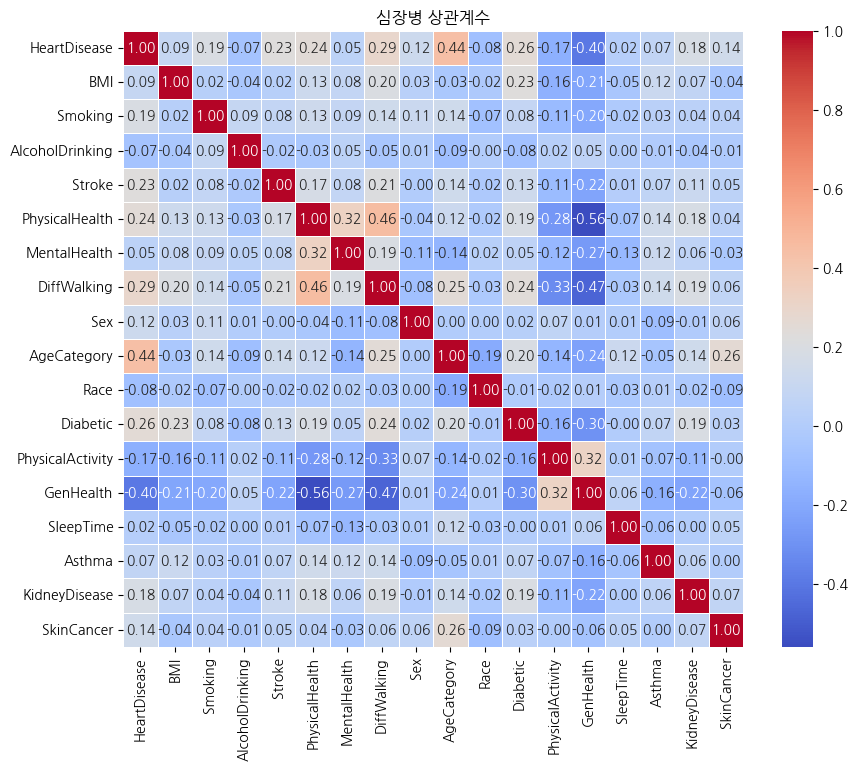

In [30]:
correlation_matrix = df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('심장병 상관계수')
plt.show()

- feature importance

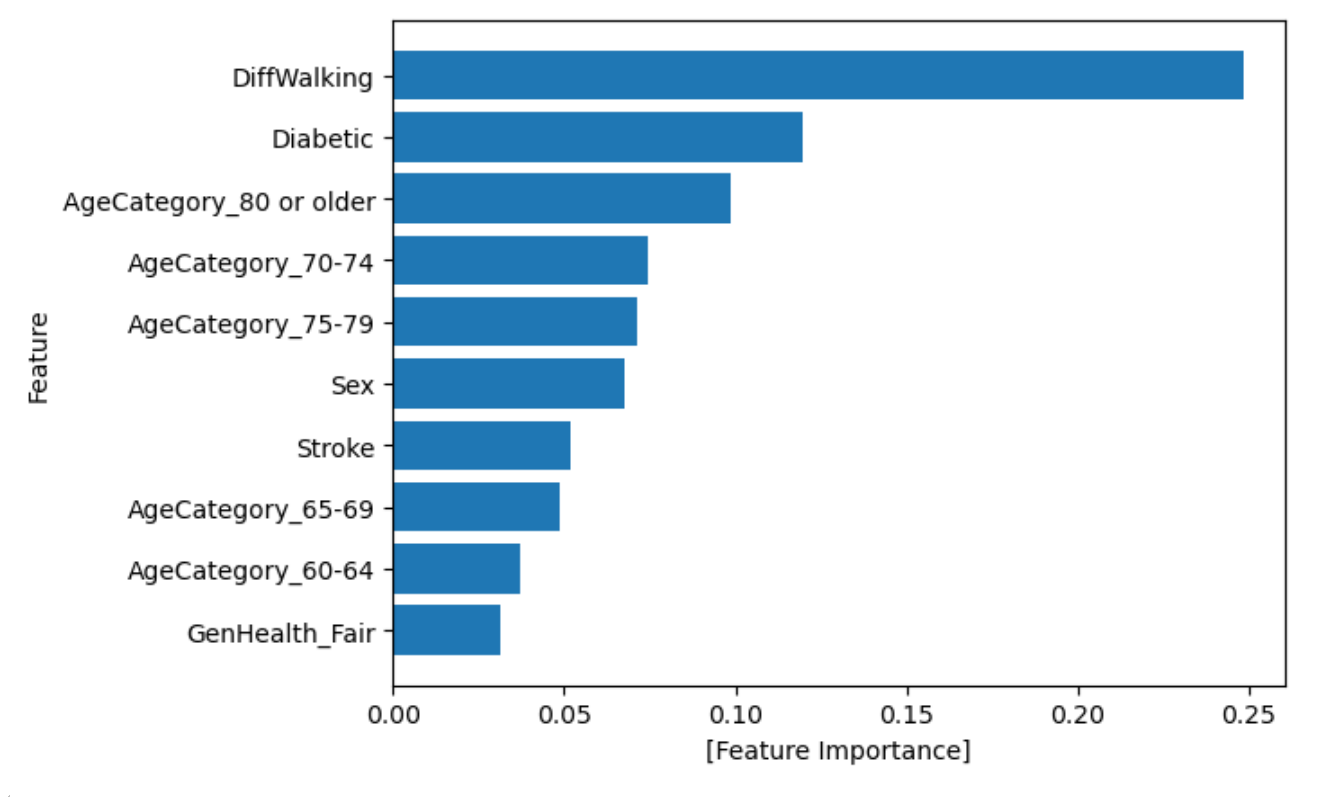

In [31]:
best_df=df[['DiffWalking','Diabetic']]

In [32]:
# scores = {}
# for k in range(1,model.n_samples_fit_+1):

#     model.n_neighbors = k

#     score = model.score(X_test_scaled,y_test)
    
#     scores[k] = score

In [33]:
# plt.plot(list(scores.keys()),list(scores.values()))
# plt.grid()
# plt.show()

[7] 예측 하기 ===> 학습/훈련과 테스트에 사용되지 않은 데이터 사용 
- 주의 : 입력 데이터 ==> 2D 

In [34]:
new_data = pd.DataFrame([[38.98,0,1,27.,21.,1,0,1,3,0,1,4,5,11.,1,0,1]], columns=df.columns.drop('HeartDisease'))
new_data

,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,38.98,0,1,27.0,21.0,1,0,1,3,0,1,4,5,11.0,1,0,1


In [35]:
new_data_scaled=mmScaler.transform(new_data)
new_data_scaled

array([[ 0.36322931,  0.        ,  1.        , 27.        ,  0.7       ,
         0.03333333,  0.        ,  1.        ,  0.16666667, -0.2       ,
         1.        ,  4.        ,  1.        ,  0.43478261,  1.        ,
         0.        ,  1.        ]])

In [36]:
# 임의의 새로운 데이터의 예측
a=pd.DataFrame(model.predict(new_data_scaled))
a


,0
0,1


In [37]:
### 최근접한 k개 데이터 찾기 
distance, index=model.kneighbors(new_data_scaled)
print(distance)
print(index)

[[26.38533114 26.3879695  26.39234242 26.39235518 26.39423057 26.39441234
  26.39565338 26.39716152 26.39760656 26.39970668 26.39974668 26.39998532
  26.40096114 26.40138651 26.4022419  26.40257956 26.40285842]]
[[ 6291 20256  8485 31944  9643 24577  2205 38950  1152 18850 25384  7821
  28017 33250  4626 29441 19865]]


In [38]:
# 2D를 1D로, array를 list로
neighbors=index.reshape(-1).tolist()
neighbors

[6291,
 20256,
 8485,
 31944,
 9643,
 24577,
 2205,
 38950,
 1152,
 18850,
 25384,
 7821,
 28017,
 33250,
 4626,
 29441,
 19865]

In [39]:
X_train_mmscaled[neighbors]

array([[0.18398915, 0.        , 0.        , 1.        , 0.        ,
        0.        , 0.        , 1.        , 0.75      , 0.2       ,
        1.        , 1.        , 0.75      , 0.30434783, 0.        ,
        0.        , 1.        ],
       [0.20502035, 0.        , 0.        , 1.        , 0.        ,
        0.        , 0.        , 1.        , 0.58333333, 0.2       ,
        1.        , 1.        , 0.75      , 0.26086957, 1.        ,
        0.        , 0.        ],
       [0.18100407, 0.        , 0.        , 1.        , 0.        ,
        0.        , 0.        , 1.        , 0.91666667, 0.2       ,
        1.        , 1.        , 0.75      , 0.30434783, 0.        ,
        0.        , 1.        ],
       [0.23704206, 0.        , 0.        , 1.        , 0.        ,
        0.        , 0.        , 1.        , 0.75      , 0.2       ,
        0.        , 1.        , 1.        , 0.30434783, 0.        ,
        0.        , 1.        ],
       [0.25929444, 0.        , 0.        , 1.      

In [40]:
pred1=X_train_mmscaled[neighbors][:,0]
pred2=X_train_mmscaled[neighbors][:,1]

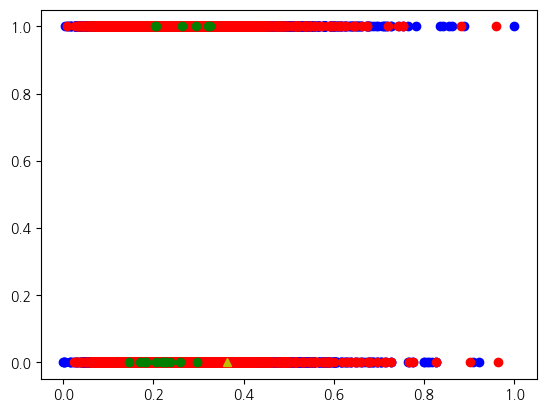

In [41]:
# 시각화로 확인

plt.scatter(X_train_mmscaled[:,0], X_train_mmscaled[:,1], c='blue')
plt.scatter(X_test_mmscaled[:,0], X_test_mmscaled[:,1], c='red')
plt.plot(new_data_scaled[0,0], new_data_scaled[0,1], 'y^')
plt.scatter(pred1, pred2, c='green')
plt.show()